# The Perceptron

In [0]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1)

## A Separable Classification Problem

In [0]:
# generate fake data that is linearly separable with a margin epsilon given the data
def getfake(samples, dimensions, epsilon):
    wfake = np.random.randn(dimensions)            # fake weight vector for separation
    bfake = np.random.randn(1)                     # fake bias
    wfake = wfake / np.linalg.norm(wfake)                 # rescale to unit length

    # making some linearly separable data, simply by chosing the labels accordingly
    X = np.zeros(shape=(samples, dimensions))
    Y = np.zeros(shape=(samples))

    i = 0
    while (i < samples):
        tmp = np.random.randn(1,dimensions)
        margin = np.dot(tmp, wfake) + bfake
        if (np.linalg.norm(tmp) < 3.) & (abs(margin) > epsilon):
            X[i,:] = tmp[0]
            Y[i] = 1 if margin > 0 else -1
            i += 1
    return X, Y

In [0]:
# plot the data with colors chosen according to the labels
def plotdata(X,Y):
    for (x,y) in zip(X,Y):
        if (y == 1):
            plt.scatter(x[0], x[1], color='r')
        else:
            plt.scatter(x[0], x[1], color='b')

# plot contour plots on a [-3,3] x [-3,3] grid 
def plotscore(w,d):
    xgrid = np.arange(-3, 3, 0.02)
    ygrid = np.arange(-3, 3, 0.02)
    xx, yy = np.meshgrid(xgrid, ygrid)
    zz = np.zeros(shape=(xgrid.size, ygrid.size, 2))
    zz[:,:,0] = np.array(xx)
    zz[:,:,1] = np.array(yy)
    vv = np.dot(zz,w) + d
    CS = plt.contour(xgrid,ygrid,vv)
    plt.clabel(CS, inline=1, fontsize=10)

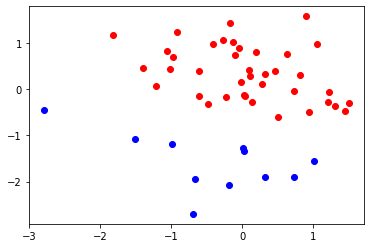

In [15]:
X, Y = getfake(50, 2, 0.3)
plotdata(X,Y)
plt.show()

## Perceptron Implementation

Encountered an error and updated parameters
data   [-0.66486777 -1.94504696], label -1.0
weight [0.66486777 1.94504696], bias  [-1.]


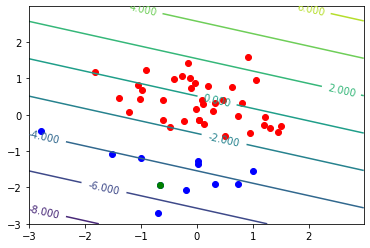

Encountered an error and updated parameters
data   [-1.05354607  0.81604368], label 1.0
weight [-0.38867831  2.76109064], bias  [0.]


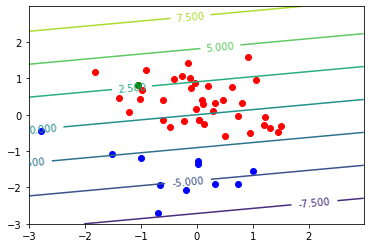

Encountered an error and updated parameters
data   [ 0.725474   -0.03917826], label 1.0
weight [0.3367957  2.72191239], bias  [1.]


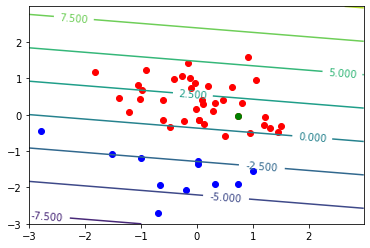

Encountered an error and updated parameters
data   [ 0.50172511 -0.59334375], label 1.0
weight [0.83852081 2.12856863], bias  [2.]


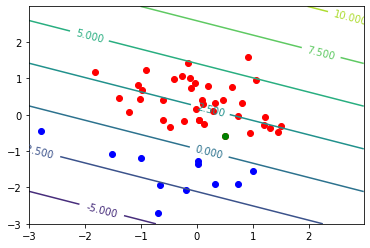

In [22]:
def perceptron(w,b,x,y):
    if (y * (np.dot(w,x) + b)) <= 0:
        w += y * x
        b += y
        return 1
    else:
        return 0

w = np.zeros(shape=(2))
b = np.zeros(shape=(1))
for (x,y) in zip(X,Y):
    res = perceptron(w,b,x,y)
    if (res == 1):
        print('Encountered an error and updated parameters')
        print('data   {}, label {}'.format(x, y))
        print('weight {}, bias  {}'.format(w, b))
        plotscore(w,b)
        plotdata(X,Y)
        plt.scatter(x[0], x[1], color='g')
        plt.show()

## Perceptron Convergence in Action

In [0]:
Eps = np.arange(0.025, 0.45, 0.025)
Err = np.zeros(shape=(Eps.size))

for j in range(10):
    for (i,epsilon) in enumerate(Eps):
        X, Y = getfake(1000, 2, epsilon)

        for (x,y) in zip(X,Y):
            Err[i] += perceptron(w,b,x,y)

Err = Err / 10.0

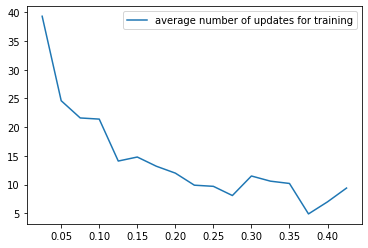

In [24]:
plt.plot(Eps, Err, label='average number of updates for training')
plt.legend()
plt.show()